June 20th, 2023, 
Dhari Gandhi 

Data Science: Midterm 

In [1]:
# Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# Read dataset
df = pd.read_csv("midterm_data.csv")
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


Plan to for the business case: 

1) Data Understanding:
Familiarize myself with the dataset and understand the meaning and structure of each variable.
Identify any missing data or data quality issues that need to be addressed.

2) Data Exploration:
Explore the distribution and summary statistics of variables such as age, time_spent, pages_visited, cart_items, cart_value, and checkout_status.
Examine any patterns or trends in the data, such as the relationship between variables and checkout status.

3) Data Analysis:
Split the data into two groups: users who checked out (checkout_status = 1) and users who did not (checkout_status = 0).
Compare the characteristics of these two groups using various statistical techniques and visualizations.
Perform statistical tests, such as t-tests or chi-square tests, to identify significant differences between the groups based on demographic variables (e.g., age, location) or behavioral variables (e.g., time_spent, pages_visited).

4) Interpretation and Recommendations (Answers to the midterm questions will be provided in this step):
Based on the analysis, identify the characteristics that distinguish users who check out from those who don't.
Generate actionable insights and recommendations for the Product team to target specific user groups or take appropriate actions to improve the checkout rate.

Step 1: Data Understanding

In [5]:
# Determine if there are any missing values 
df.isnull().sum()

userID               0
age                  0
sessions             0
time_spent           0
pages_visited        0
cart_items           0
cart_value           0
checkout_status      0
device             100
location            30
dtype: int64

The two columns with missing values are as follows: 
- 'device': 100/5000 = 2% missing values
- 'location': 30/5000 = 0.6% missing values

Given that the percentage of missing values is relatively small for both variables, it would be a good choice to drop the rows with missing values as opposed to imputing them.

In [6]:
# Drop missing values in dataframe
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

userID             0
age                0
sessions           0
time_spent         0
pages_visited      0
cart_items         0
cart_value         0
checkout_status    0
device             0
location           0
dtype: int64

In [8]:
# Check data types 
df.dtypes

userID               int64
age                  int64
sessions             int64
time_spent         float64
pages_visited        int64
cart_items           int64
cart_value         float64
checkout_status      int64
device              object
location            object
dtype: object

Based on results, to strengthen the data quality prior to conducting analysis: 
- May be optimal to convert the 'device' and 'location' variables to categorical data types, as they represent categorical information

In [9]:
df['device'] = df['device'].astype('category')
df['location'] = df['location'].astype('category')

Step 2: Data Exploration

In [10]:
# Calculate overall checkout rate
checkout_rate = df['checkout_status'].mean()
print("Overall Checkout Rate:", checkout_rate)

# Compare checkout rates by device type
checkout_rate_by_device = df.groupby('device')['checkout_status'].mean()
print("Checkout Rate by Device:")
print(checkout_rate_by_device)

# Compare checkout rates by age group
age_groups = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 100])
checkout_rate_by_age = df.groupby(age_groups)['checkout_status'].mean()
print("Checkout Rate by Age Group:")
print(checkout_rate_by_age)

Overall Checkout Rate: 0.2734551426811743
Checkout Rate by Device:
device
Desktop    0.285488
Mobile     0.263938
Tablet     0.255365
Name: checkout_status, dtype: float64
Checkout Rate by Age Group:
age
(0, 20]      0.284768
(20, 30]     0.290200
(30, 40]     0.269990
(40, 50]     0.266667
(50, 60]     0.260786
(60, 100]    0.277778
Name: checkout_status, dtype: float64


Output indicates: 
- Device:
Desktop users have a slightly higher checkout rate compared to mobile and tablet users. This suggests that the checkout experience on desktop devices may be more optimized or user-friendly, leading to a higher conversion rate. The business should focus on maintaining and improving the checkout experience for desktop users.

Mobile and tablet users have lower checkout rates. This indicates that there may be usability or user experience issues on these devices that hinder the checkout process. The business should prioritize optimizing the checkout flow for mobile and tablet users to increase the conversion rate.

- Age Group:
Users in the age group of 20-30 have the highest checkout rate, followed closely by the 0-20 and 60-100 age groups. This suggests that these age groups are more likely to complete the checkout process.

Users in the age groups of 30-40, 40-50, and 50-60 have slightly lower checkout rates. This indicates that there may be factors specific to these age groups that impact their willingness to complete the checkout process. Further analysis is needed to understand the underlying reasons and take targeted actions.

Based on these implications, the business can focus on improving the checkout experience on mobile and tablet devices to increase the conversion rate for users accessing the website through these devices.

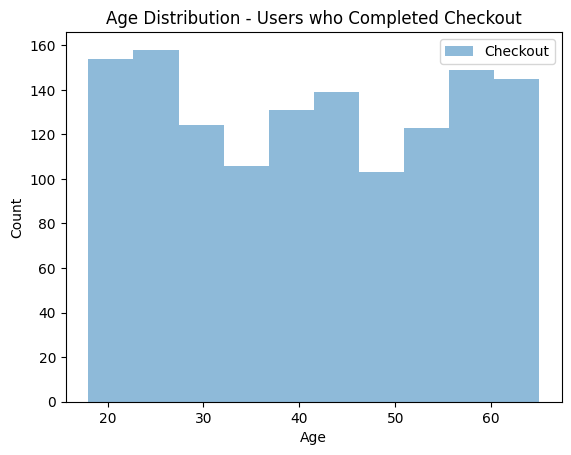

In [11]:
# Histogram of age distribution for users who completed checkout
plt.hist(df[df['checkout_status'] == 1]['age'], bins=10, alpha=0.5, label='Checkout')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution - Users who Completed Checkout')
plt.legend()
plt.show()

In [12]:
# Compare time spent and pages visited for users who completed checkout and those who did not
checkout_users = df[df['checkout_status'] == 1]
non_checkout_users = df[df['checkout_status'] == 0]

mean_time_spent = df['time_spent'].mean()
mean_pages_visited = df['pages_visited'].mean()

mean_time_spent_checkout = checkout_users['time_spent'].mean()
mean_pages_visited_checkout = checkout_users['pages_visited'].mean()

mean_time_spent_non_checkout = non_checkout_users['time_spent'].mean()
mean_pages_visited_non_checkout = non_checkout_users['pages_visited'].mean()

print("Overall Mean Time Spent:", mean_time_spent)
print("Overall Mean Pages Visited:", mean_pages_visited)
print("Mean Time Spent - Checkout Users:", mean_time_spent_checkout)
print("Mean Pages Visited - Checkout Users:", mean_pages_visited_checkout)
print("Mean Time Spent - Non-checkout Users:", mean_time_spent_non_checkout)
print("Mean Pages Visited - Non-checkout Users:", mean_pages_visited_non_checkout)

Overall Mean Time Spent: 25.172037689880312
Overall Mean Pages Visited: 5.777458427427633
Mean Time Spent - Checkout Users: 31.318157090728228
Mean Pages Visited - Checkout Users: 7.28978978978979
Mean Time Spent - Non-checkout Users: 22.858776587328904
Mean Pages Visited - Non-checkout Users: 5.208250918338513


Output:
- The findings suggest a positive correlation between user engagement metrics (time spent and pages visited) and the likelihood of completing the checkout process. Users who spend more time exploring the website and visit more pages exhibit higher conversion rates.

To improve the checkout rate, the business can focus on enhancing user engagement by implementing strategies to increase the average time spent on the website and encourage users to navigate through more pages. This could include improving website content, enhancing user experience, optimizing page load times, and providing personalized recommendations to increase user interest and involvement.

Additionally, the business can analyze the specific pages or sections where users tend to spend more time and visit more frequently, as these areas may provide valuable insights for conversion optimization and targeted marketing efforts.

In [13]:
# Compare cart items and cart value for users who completed checkout and those who did not
mean_cart_items_checkout = checkout_users['cart_items'].mean()
mean_cart_items_non_checkout = non_checkout_users['cart_items'].mean()

mean_cart_value_checkout = checkout_users['cart_value'].mean()
mean_cart_value_non_checkout = non_checkout_users['cart_value'].mean()

print("Mean Cart Items - Checkout Users:", mean_cart_items_checkout)
print("Mean Cart Items - Non-checkout Users:", mean_cart_items_non_checkout)
print("Mean Cart Value - Checkout Users:", mean_cart_value_checkout)
print("Mean Cart Value - Non-checkout Users:", mean_cart_value_non_checkout)

Mean Cart Items - Checkout Users: 14.096846846846846
Mean Cart Items - Non-checkout Users: 15.300367335405483
Mean Cart Value - Checkout Users: 140.51087087087086
Mean Cart Value - Non-checkout Users: 152.82748516530097


Output: 
- Mean Cart Items: Users who complete check out have, on average, a slightly lower number of cart items (14.10) compared to users who do not complete check out (15.30). This suggests that users who have a lower number of items in their cart are more likely to proceed with the checkout process.
- Mean Cart Value: Users who complete check out have, on average, a lower cart value ($140.51) compared to users who do not complete check out ($152.83). This indicates that users who have a lower total value of items in their cart are more likely to proceed with the checkout process.

Based on the analysis of cart-related variables, it is evident that both the number of items in the cart and the cart value have an impact on the checkout behavior. However, the relationship is not straightforward as many other factors seem to be affecting these checkout decisions.

Checkout Rate by Location:
location
Location 1    0.280538
Location 2    0.267094
Location 3    0.265531
Location 4    0.283074
Location 5    0.270414
Name: checkout_status, dtype: float64


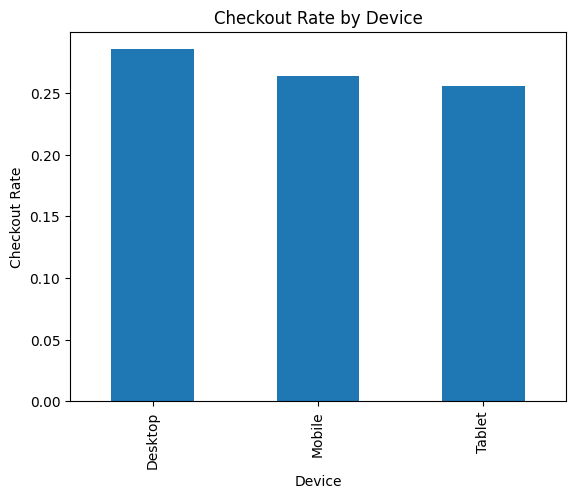

In [14]:
# Compare checkout rates by location
checkout_rate_by_location = df.groupby('location')['checkout_status'].mean()
print("Checkout Rate by Location:")
print(checkout_rate_by_location)

# Create a bar plot to visualize checkout rates by device type
checkout_rate_by_device.plot(kind='bar')
plt.xlabel('Device')
plt.ylabel('Checkout Rate')
plt.title('Checkout Rate by Device')
plt.show()

Output: 
- The checkout rates vary slightly across different locations, with Location 4 having the highest checkout rate (28.31%) and Location 3 having the lowest (26.55%). This indicates that there may be location-specific factors influencing the checkout behavior of users, but not too drastically. 
- When considering the influence of device, the bar plot shows that the three different devices (desktop, mobile, tablet) have similar checkout rates. However, the checkout rate for desktop users is slightly higher compared to mobile and tablet users.

The variation in checkout rates across different locations suggests that there may be regional differences in user behavior or preferences. It is important for the business to further investigate the factors that contribute to these variations. This could involve analyzing user demographics, cultural differences, or specific market conditions in each location.

Regarding device influence, although the checkout rates are similar across desktop, mobile, and tablet, the slightly higher checkout rate for desktop users indicates that desktop may be a preferred device for completing the checkout process. This information can be valuable for optimizing the user experience and interface design specifically for desktop users, ensuring a seamless and convenient checkout process on that platform.

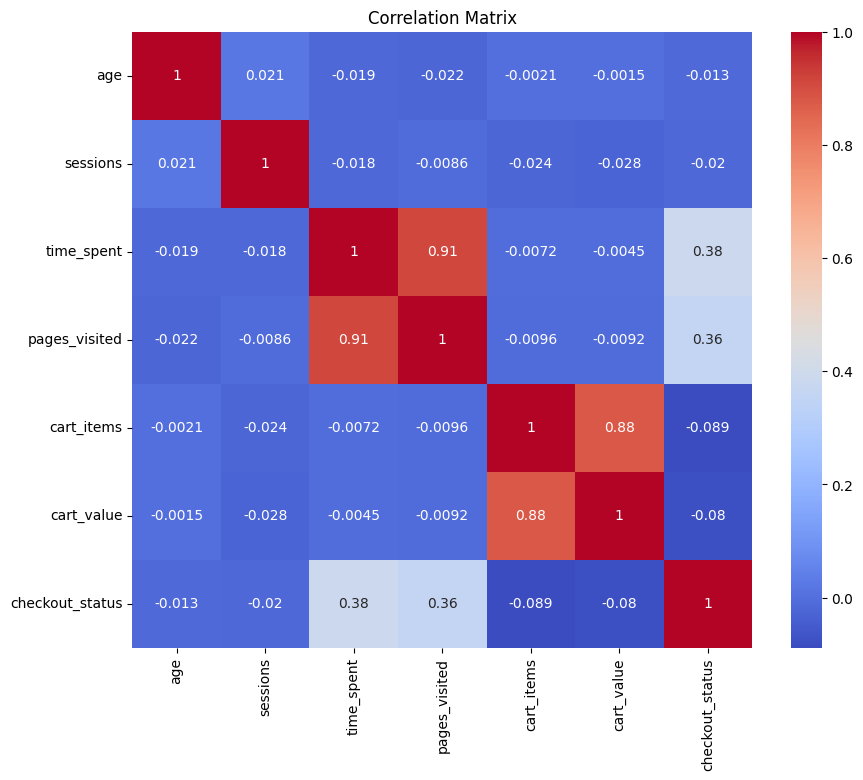

In [16]:
# Calculate correlation matrix
numeric_columns = ['age', 'sessions', 'time_spent', 'pages_visited', 'cart_items', 'cart_value', 'checkout_status']
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap to visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
correlation_matrix

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
age,1.000000,0.020722,-0.019453,-0.021942,-0.002114,-0.001506,-0.013017
sessions,0.020722,1.000000,-0.017793,-0.008571,-0.023971,-0.027667,-0.019821
time_spent,-0.019453,-0.017793,1.000000,0.911349,-0.007222,-0.004456,0.383940
pages_visited,-0.021942,-0.008571,0.911349,1.000000,-0.009649,-0.009155,0.361587
cart_items,-0.002114,-0.023971,-0.007222,-0.009649,1.000000,0.877359,-0.088606
cart_value,-0.001506,-0.027667,-0.004456,-0.009155,0.877359,1.000000,-0.079790
checkout_status,-0.013017,-0.019821,0.383940,0.361587,-0.088606,-0.079790,1.000000


Output: 
- 'pages_visited' and 'time_spent' have a high correlation of 0.91
- 'cart_value' and 'cart_items' have a high correlation of 0.88
- 'cart_items' and 'checkout_status' are not correlated at all with a correlation score of 0.089 (lowest)

The strong positive correlation between time_spent and pages_visited suggests that users who spend more time on the website tend to visit more pages. This indicates that engagement and exploration of the website's content are important factors in driving users towards checking out. The business can focus on improving the user experience and providing engaging content to encourage users to spend more time on the site and explore more pages, ultimately increasing the chances of checkout.

The strong positive correlation also between cart_items and cart_value indicates that users who add more items to their cart tend to have a higher total cart value. This suggests that users who show a higher level of interest in the products and add more items to their cart are likely to have higher potential value for the business. The company can focus on strategies to upsell or cross-sell additional products to users who already have items in their cart, aiming to increase the cart value and potentially the checkout rate.

The moderate positive correlation between checkout_status and time_spent, pages_visited, and cart_items indicates that these variables have some influence on the likelihood of users checking out. Users who spend more time on the website, visit more pages, and have a higher number of items in their cart may be more inclined to proceed with the checkout process. The company can prioritize efforts to optimize these variables, such as enhancing the browsing experience, providing relevant recommendations based on pages visited, or offering incentives for users to add more items to their cart, in order to increase the overall checkout rate.

Step 3: Data Analysis

In [18]:
# Split the data into two groups: users who checked out (checkout_status = 1) and users who did not (checkout_status = 0)
checkout_users = df[df['checkout_status'] == 1]
non_checkout_users = df[df['checkout_status'] == 0]

Compare the characteristics of these two groups:

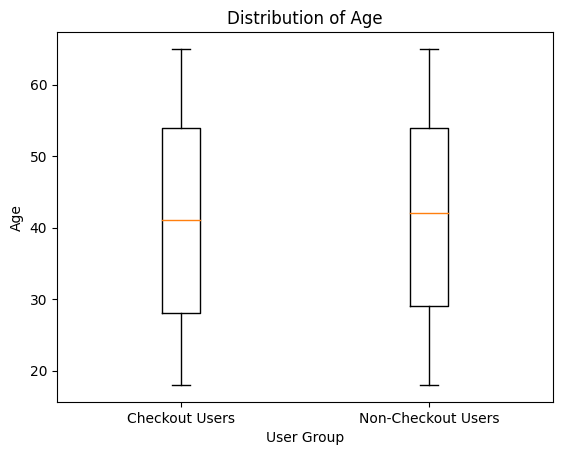

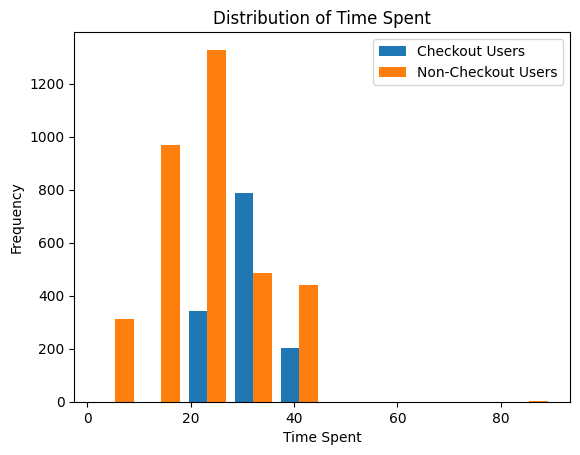

In [24]:
# For numerical variables 

# Descriptive statistics
checkout_users['age'].describe()
non_checkout_users['age'].describe()

# Box plot
plt.boxplot([checkout_users['age'], non_checkout_users['age']], labels=['Checkout Users', 'Non-Checkout Users'])
plt.xlabel('User Group')
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()

# Histogram
plt.hist([checkout_users['time_spent'], non_checkout_users['time_spent']], bins=10, label=['Checkout Users', 'Non-Checkout Users'])
plt.xlabel('Time Spent')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent')
plt.legend()
plt.show()

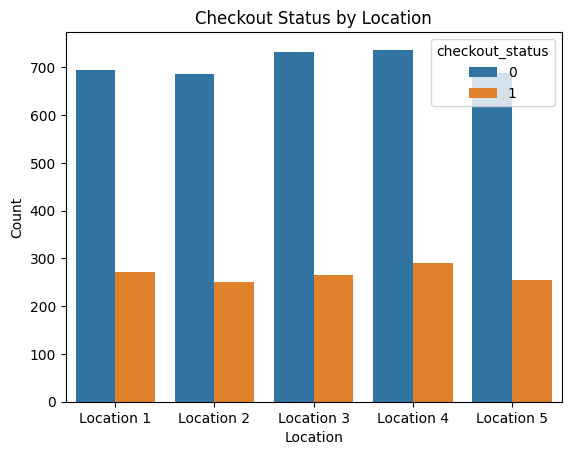

In [23]:
# For categorical variables 

# Countplot
sns.countplot(x='location', hue='checkout_status', data=df)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Checkout Status by Location')
plt.show()

In [26]:
# Using statistical tests
from scipy.stats import ttest_ind, chi2_contingency

# T-tests for numerical variables
numeric_vars = ['age', 'time_spent', 'pages_visited', 'cart_items', 'cart_value']

for var in numeric_vars:
    t_stat, p_value = ttest_ind(checkout_users[var], non_checkout_users[var])
    print(f'{var}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}')

# Chi-square test for categorical variables
categorical_vars = ['location', 'device']

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['checkout_status'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f'{var}: chi-square = {chi2:.3f}, p-value = {p_value:.3f}')

age: t-statistic = -0.908, p-value = 0.364
time_spent: t-statistic = 29.014, p-value = 0.000
pages_visited: t-statistic = 27.062, p-value = 0.000
cart_items: t-statistic = -6.207, p-value = 0.000
cart_value: t-statistic = -5.585, p-value = 0.000
location: chi-square = 1.273, p-value = 0.866
device: chi-square = 4.019, p-value = 0.134


Output: 
- For numerical variables (age, time_spent, pages_visited, cart_items, cart_value):
The t-statistic measures the difference in means between the checkout and non-checkout groups. A negative t-statistic for age suggests that the average age of users who checked out is slightly lower, but the difference is not statistically significant (p-value > 0.05).

For time_spent and pages_visited, both t-statistics are significantly different from zero, indicating that there are substantial differences in the average time spent and pages visited between the checkout and non-checkout groups (p-value < 0.05).

For cart_items and cart_value, both t-statistics are significantly different from zero. This indicates a significant difference in the mean cart_items and cart_value of between users who complete check out and those who do not. It suggests that users who check out tend to have a lower average number of items in their cart and lower average cart value compared to non-checkout users.

- For categorical variables (location, device):
The chi-square statistic measures the association between the categorical variable and the checkout status. For both location and device, the chi-square values are relatively small, indicating a weak association between these variables and the checkout status.

The p-values for both variables are greater than 0.05, suggesting that there is no significant difference in the distribution of checkout status across different locations or devices.

Therefore, baed on the results Age does not appear to be a significant factor in differentiating users who checked out versus those who did not. Location and device do not seem to have a strong association with the checkout status as well. Although, Time spent and pages visited show significant differences between the two groups, suggesting that these variables might be important indicators of user behavior in relation to checkout.

Step 4: Interpretation and Recommendations (Answers to the midterm questions)

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

Based on the analysis conducted on the dataset, we have gained valuable insights into the behavior and characteristics of users who complete check out compared to those who do not. Here are the key conclusions drawn from the analysis:

- Device and Location: The type of device used by users (desktop, mobile, tablet) does not significantly influence the checkout rate. All devices have similar checkout rates, with desktop showing slightly higher rates. Similarly, the location of users also does not show a significant impact on the checkout rate, as all locations have relatively similar rates.

- Age: The age of users does not have a substantial effect on the checkout rate. Users across different age groups, ranging from 0-100 years, exhibit similar checkout rates.

- User Engagement: Users who complete check out tend to spend more time on the website and visit more pages compared to non-checkout users. This indicates that higher user engagement and involvement in browsing the website may contribute to a higher likelihood of completing the check out process.

- Cart Items and Cart Value: Users who complete check out have, on average, a lower number of items in their cart and a lower cart value compared to non-checkout users. This suggests that users who have a smaller number of items or a lower cart value are more likely to proceed with the check out.

These findings highlight the importance of user engagement, as users who spend more time on the website and explore more pages have a higher probability of completing the check out. Additionally, users with fewer items in their cart and a lower cart value are more likely to convert.


2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

To prepare the data for analysis, several data cleaning and preparation steps were undertaken to ensure the accuracy and reliability of the results. The following approaches were employed:

- Handling Missing Values: Initially, the presence of missing values in the dataset was identified using the df.isnull().sum() function. It was observed that the 'device' column had 100 missing values, and the 'location' column had 30 missing values. Considering the relatively small percentage of missing values in these columns (100/5000 and 30/5000), the decision was made to drop the rows with missing values. Dropping the rows ensures that we retain the integrity of the dataset without introducing bias through imputation.

- Data Type Validation: To ensure data quality, the data types of each column were checked using the df.dtypes function. It was confirmed that the data types for 'userID', 'age', 'sessions', 'time_spent', 'pages_visited', 'cart_items', 'cart_value', and 'checkout_status' were appropriately set as int64 or float64, representing numerical variables. The 'device' and 'location' columns were correctly converted to object data types, as they were categorical variables.

In summary: Dropping rows with missing values was selected as the missing values were relatively small in proportion, reducing the risk of biased imputation. Validating data types ensured that the analysis was conducted on the correct variable types, preventing errors in calculations. This helped prepare the data for statistical tests and visualizations which allowed for a comprehensive understanding of the data, enabling meaningful insights to be derived.

Overall, these data cleaning and preparation approaches were deemed the best choices to ensure the accuracy, reliability, and integrity of the analysis, leading to robust conclusions and recommendations for the e-commerce company.


3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

Based on the analysis conducted, several recommendations can be made to the product team to address the issue of low checkout rates and improve user engagement. These recommendations are based on the insights gained from the data analysis:

- Optimize Cart Items and Cart Value: The analysis of cart-related variables revealed that users who complete checkout tend to have slightly lower average cart items and cart value compared to non-checkout users. This suggests that the checkout process may be a point of friction for users. To address this, the product team should focus on optimizing the cart experience to facilitate a smoother checkout process. 
To start, streamlining the steps required for checkout by minimizing form fields, simplifying the payment process, and providing clear instructions can reduce user friction and encourage completion. 
Additionally, implementing features such as a progress indicator and a summary of selected items throughout the checkout process can help users feel more confident and in control of their purchase. Offering incentives, such as free shipping or discounts on larger cart values, can incentivize users to add more items to their cart and increase the overall cart value. 
Moreover, providing clear and transparent pricing information, including any additional fees or charges, can build trust and prevent surprises during the checkout process. 

- Increase User Engagement: The analysis revealed that users who complete checkout exhibit higher engagement (visit more pages) compared to those who do not.To further enhance user engagement and increase the likelihood of checkout, the product team should implement several strategies.
Firstly, optimizing the overall user experience by improving website navigation, reducing page load times, and ensuring intuitive and user-friendly interfaces can contribute to a more engaging browsing experience. 
Secondly, providing personalized product recommendations based on users' browsing history, cart items, and preferences can help capture their interest and encourage them to explore additional items.
Additionally, implementing gamification elements, such as loyalty programs, rewards, and challenges, can incentivize users to actively participate on the platform and increase their overall engagement. 
Furthermore, leveraging social proof through user reviews and ratings can enhance trust and credibility, motivating users to proceed with checkout. 
Lastly, implementing targeted email marketing campaigns and remarketing efforts can remind users about their abandoned carts and provide additional incentives or discounts to encourage them to complete their purchase. 

- Target User Segments with Higher Engagement: The analysis of user engagement across different age groups indicated that users in the age range of 20-30 exhibit the highest checkout rate. This finding suggests that the product team should focus on understanding the preferences and needs of this specific age group. By conducting further research and gathering insights into their shopping behavior, interests, and motivations, the team can develop targeted strategies to enhance engagement and encourage checkout. This may involve creating personalized marketing campaigns, tailored product recommendations, and exclusive offers that align with the preferences and aspirations of users in this age bracket. Furthermore, implementing interactive features and social elements within the platform, such as user-generated content or gamification elements, can help create a sense of community and encourage active participation among users. 

- Enhance User Experience for Mobile and Tablet Users: Although the analysis revealed similar checkout rates across different devices (desktop, mobile, tablet), it is important to optimize the user experience for mobile and tablet users. The product team should invest in understanding the specific challenges and pain points that mobile and tablet users may encounter during the checkout process. This could involve conducting usability tests, gathering feedback from users, and analyzing user behavior data to identify any friction points. Based on these insights, the team can make necessary improvements to the mobile and tablet user interface, streamlining the checkout process, and ensuring that it is intuitive and user-friendly. Additionally, responsive design and optimization techniques should be implemented to ensure a seamless browsing and purchasing experience across different screen sizes. 

- Location-based Personalization: Analyzing the checkout rates by location revealed minor variations, with different locations exhibiting similar checkout rates. However, leveraging location data can still be valuable for personalization efforts. The product team should consider incorporating location-based personalization strategies to enhance user engagement and drive conversions. By utilizing location data, the team can deliver targeted content, promotions, and recommendations that are relevant to users in specific regions. This could involve tailoring marketing campaigns based on local preferences, offering location-specific discounts or offers, and showcasing products that are popular in particular areas. Additionally, the team can explore partnerships with local businesses or influencers to create location-specific collaborations that resonate with users. By providing personalized experiences based on user location, the product team can create a stronger connection with users, increase their engagement with the platform, and ultimately drive higher checkout rates.

- Continuous Monitoring and Experimentation: To ensure ongoing improvement in checkout rates and user engagement, the product team should adopt a data-driven approach. This involves continuously monitoring key metrics such as checkout rates, time spent on the website, pages visited, and cart-related variables. By tracking these metrics over time, the team can identify trends, detect any issues or bottlenecks in the checkout process, and make data-informed decisions to address them.

In addition to monitoring, conducting A/B testing and experimentation is crucial. The product team should design experiments to test different features, messaging, and incentives aimed at improving checkout rates. By randomly assigning users to different variations and comparing the outcomes, the team can gather valuable insights on what resonates with users and what drives higher conversion rates. Iterating based on user feedback and data analysis allows the team to refine and optimize the user experience continuously.

Regular communication with users through surveys or feedback mechanisms can also provide valuable insights. Collecting feedback on pain points, barriers, or suggestions for improvement can inform future development and help prioritize initiatives. By incorporating user feedback into the decision-making process, the product team can address user needs and preferences more effectively, resulting in a better user experience and higher checkout rates.

Overall, adopting a data-driven approach, continuously monitoring key metrics, conducting experiments, and leveraging user feedback are essential for optimizing the user experience and driving higher conversion rates. By staying agile and responsive to user behavior and preferences, the product team can ensure that the platform meets user expectations and encourages more users to complete the checkout process.
